In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Baca Data
golf = pd.read_csv('golf_dataset.csv', low_memory=True)

# Data Understanding

Cek Informasi Dataset

In [ ]:
# Tampilkan informasi data
golf.info()

# Ringkasan tipe data
print("\nJumlah Tipe Data")
display(golf.dtypes.value_counts())

# Lihat dimensi data
print(f"\nJumlah baris: {golf.shape[0]}")
print(f"Jumlah kolom: {golf.shape[1]}")

# Lihat 5 baris pertama data
print("\nLihat 5 baris pertama data:")
golf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             7665 non-null   object 
 1   Weekday          7665 non-null   int64  
 2   Holiday          7665 non-null   int64  
 3   Month            7665 non-null   object 
 4   Season           7665 non-null   object 
 5   Temperature      7665 non-null   float64
 6   Humidity         7665 non-null   float64
 7   Windy            7665 non-null   int64  
 8   Outlook          7665 non-null   object 
 9   Crowdedness      7665 non-null   float64
 10  EmailCampaign    7665 non-null   object 
 11  MaintenanceTask  7665 non-null   object 
 12  ID               7665 non-null   object 
 13  Play             7665 non-null   int64  
 14  PlayTimeHour     7665 non-null   float64
 15  Review           1352 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 958.3+ KB



,count
object,8
int64,4
float64,4



Jumlah baris: 7665
Jumlah kolom: 16

Lihat 5 baris pertama data:


,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN
3,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",D,1,3.6,"Ah, the exhilarating dance with the wind today..."
4,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",E,1,3.4,The atmosphere on the course was nothing short...


Cek Duplicate Values

In [ ]:
print("Jumlah baris duplikat:", golf.duplicated().sum())

Jumlah baris duplikat: 0


Cek Missing Values

In [ ]:
print("Jumlah nilai kosong:", golf.isna().sum())

Jumlah nilai kosong: Date                  0
Weekday               0
Holiday               0
Month                 0
Season                0
Temperature           0
Humidity              0
Windy                 0
Outlook               0
Crowdedness           0
EmailCampaign         0
MaintenanceTask       0
ID                    0
Play                  0
PlayTimeHour          0
Review             6313
dtype: int64


Statistik Deskriptif

In [ ]:
# Data Numerik
print("Deskriptif Statistik Numerik")
display(golf.select_dtypes(include=[np.number]).describe().T)

# Data Kategorik
print("\nDeskriptif Data Kategorik")
display(golf.select_dtypes(include=['object', 'category']).describe().T)


Deskriptif Statistik Numerik


,count,mean,std,min,25%,50%,75%,max
Weekday,7665.0,3.005479,2.000580,0.0,1.00,3.00,5.00,6.0
Holiday,7665.0,0.044749,0.206766,0.0,0.00,0.00,0.00,1.0
Temperature,7665.0,13.435525,8.040172,-2.0,6.00,13.80,20.50,29.5
Humidity,7665.0,61.525114,14.429511,18.0,52.00,61.00,72.00,99.0
Windy,7665.0,0.507763,0.499972,0.0,0.00,1.00,1.00,1.0
Crowdedness,7665.0,0.620721,0.150415,0.0,0.53,0.63,0.72,1.0
Play,7665.0,0.182518,0.386296,0.0,0.00,0.00,0.00,1.0
PlayTimeHour,7665.0,0.642035,1.381454,0.0,0.00,0.00,0.00,5.2



Deskriptif Data Kategorik


,count,unique,top,freq
Date,7665,1095,2023-12-31,7
Month,7665,12,Jan,651
Season,7665,4,Summer,1974
Outlook,7665,4,sunny,3241
EmailCampaign,7665,1095,Bid adieu to 2023 with a snowy swing! It’s 1.8...,7
MaintenanceTask,7665,194,[],1820
ID,7665,7,A,1095
Review,1352,1350,"Oh, what a glorious day on the greens! The sun...",2


Lihat Cardinality Data Awal

In [ ]:
cardinality = (golf.nunique() / len(golf)).sort_values(ascending=False)
lihat_cardinality = pd.DataFrame({'unique_count': golf.nunique(),
                    'cardinality_ratio': cardinality})

# Urutkan dari tertinggi
cek = lihat_cardinality.sort_values(by='cardinality_ratio', ascending=False)
print(cek)

                 unique_count  cardinality_ratio
Review                   1350           0.176125
Date                     1095           0.142857
EmailCampaign            1095           0.142857
Temperature               289           0.037704
MaintenanceTask           194           0.025310
Crowdedness                83           0.010828
Humidity                   76           0.009915
PlayTimeHour               25           0.003262
Month                      12           0.001566
ID                          7           0.000913
Weekday                     7           0.000913
Season                      4           0.000522
Outlook                     4           0.000522
Holiday                     2           0.000261
Play                        2           0.000261
Windy                       2           0.000261


# Data Preparation

Cek Distribusi Target

In [ ]:
target = ['Play']

for col in target:
  value_count = golf[col].value_counts(dropna=False)
  distribusi = golf[col].value_counts(normalize=True, dropna=False) * 100

  summary = pd.DataFrame({
    'Jumlah': value_count,
    'Distribusi (%)': distribusi.round(2)
  }).reset_index().rename(columns=({'index': 'Value'}))

  display(summary)

,Play,Jumlah,Distribusi (%)
0,0,6266,81.75
1,1,1399,18.25


Deteksi Outlier (Boxplot)

In [ ]:
outlier_columns = []

for col in outlier_columns:
  Q1 = golf[col].quantile(0.25)
  Q3 = golf[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_count = ((golf[col] < lower) | (golf[col] > upper)).sum()

  if outlier_count > 0:
    outlier_columns.append(col)

outlier_columns

[]

Korelasi Fitur (Heatmap)

               Weekday   Holiday  Temperature  Humidity     Windy  \
Weekday       1.000000 -0.091123    -0.008706 -0.027595  0.000871   
Holiday      -0.091123  1.000000    -0.021669 -0.021653 -0.016613   
Temperature  -0.008706 -0.021669     1.000000  0.683181 -0.162446   
Humidity     -0.027595 -0.021653     0.683181  1.000000 -0.115711   
Windy         0.000871 -0.016613    -0.162446 -0.115711  1.000000   
Crowdedness   0.396906  0.124362     0.013121 -0.355853 -0.164217   
Play          0.159270  0.077427    -0.021652 -0.096551 -0.054290   
PlayTimeHour  0.163959  0.078471    -0.021036 -0.103867 -0.078078   

              Crowdedness      Play  PlayTimeHour  
Weekday          0.396906  0.159270      0.163959  
Holiday          0.124362  0.077427      0.078471  
Temperature      0.013121 -0.021652     -0.021036  
Humidity        -0.355853 -0.096551     -0.103867  
Windy           -0.164217 -0.054290     -0.078078  
Crowdedness      1.000000  0.180772      0.194391  
Play          

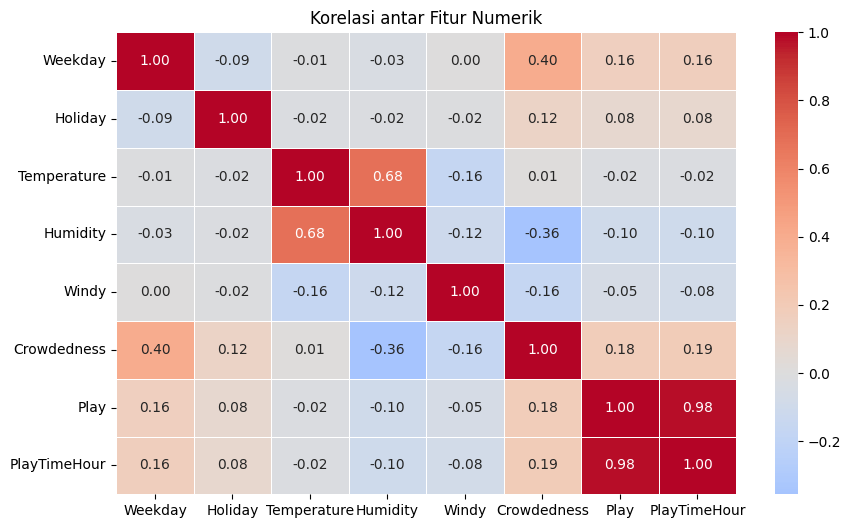

In [ ]:
num_columns = golf.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = num_columns.corr()

# Print correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt='.2f', linewidth=0.5)
plt.title("Korelasi antar Fitur Numerik")
plt.show()

Filter kolom tidak perlu

In [ ]:
filter_col = ['Date', 'Review', 'PlayTimeHour', 'EmailCampaign', 'ID', 'MaintenanceTask']
golf_filtered = golf[[col for col in golf.columns if col not in filter_col]]


Exploratory Data Analysis (EDA)

Univariate Analysis

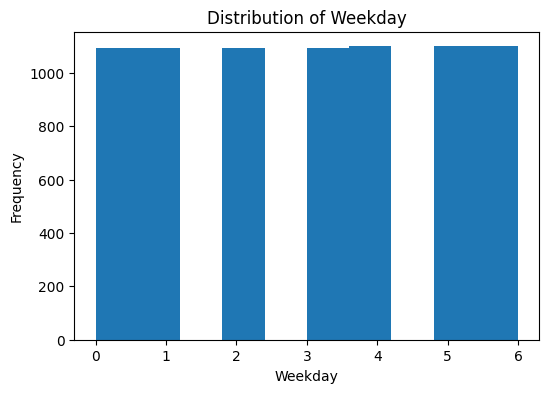

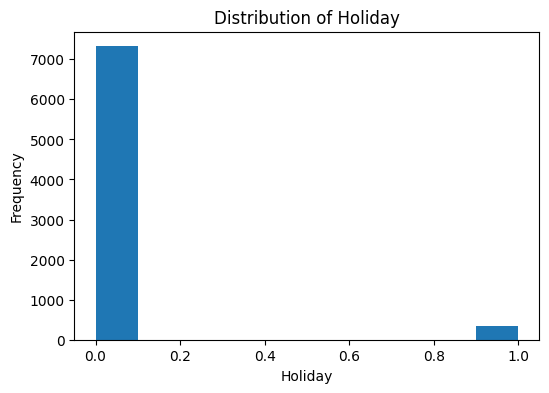

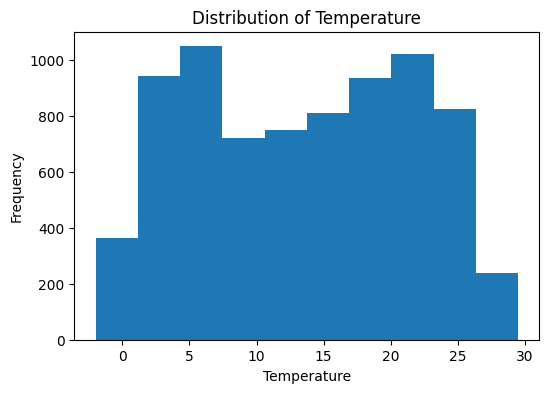

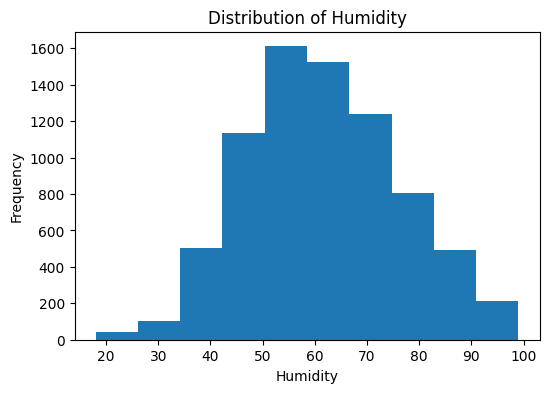

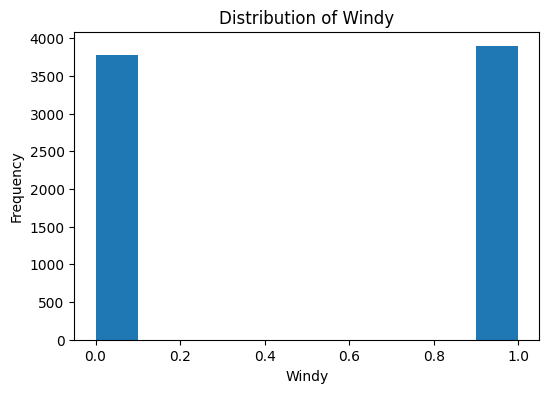

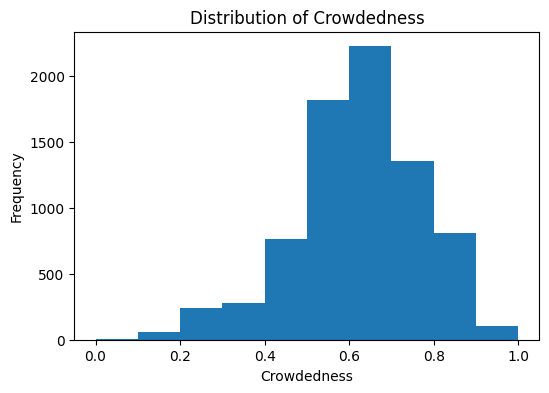

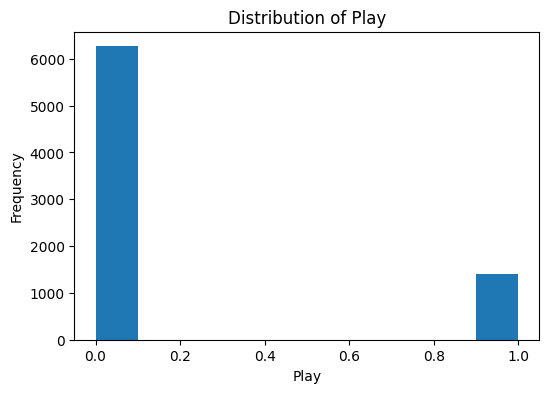

In [ ]:
# Tampilkan visualisasi data numerik
num_columns = golf_filtered.select_dtypes(include=np.number)

# Plotting
for col in num_columns:
    plt.figure(figsize=(6,4))
    plt.hist(golf_filtered[col].dropna())
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

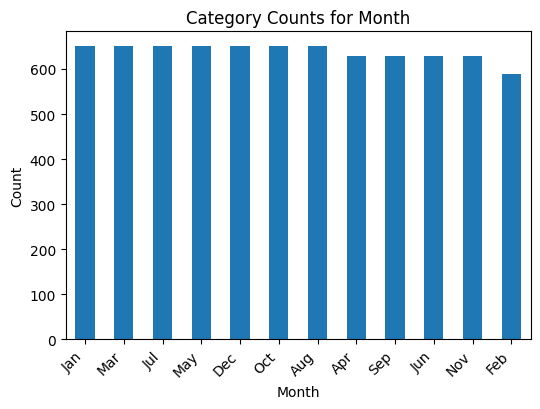

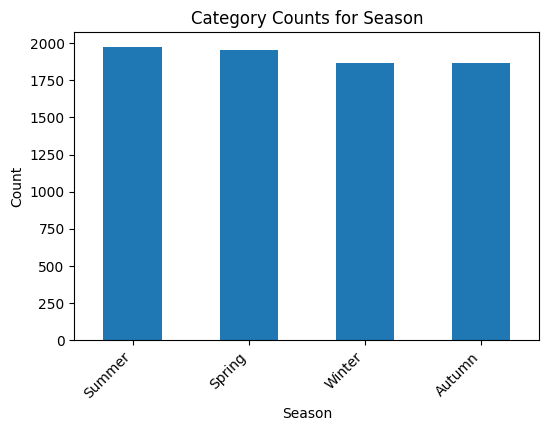

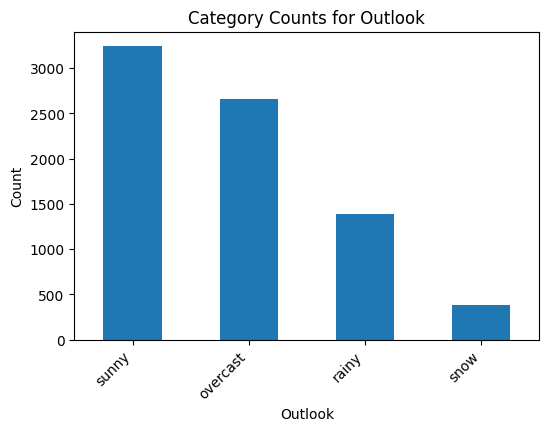

In [ ]:
# Identifikasi kolom kategorikal
cat_columns = golf_filtered.select_dtypes(include=['object']).columns

# Plot Categorical Data Distribution
for col in cat_columns:
    plt.figure(figsize=(6,4))
    golf_filtered[col].value_counts().plot(kind='bar')
    plt.title(f"Category Counts for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()

Data Preprocessing - Encoding Kolom Kategorikal

In [ ]:
# Data Kategorik
print("\nDeskriptif Data Kategorik")
display(golf_filtered.select_dtypes(include=['object', 'category']).describe().T)



Deskriptif Data Kategorik


,count,unique,top,freq
Month,7665,12,Jan,651
Season,7665,4,Summer,1974
Outlook,7665,4,sunny,3241


In [ ]:
golf_filtered['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
golf_filtered['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
golf_filtered['Outlook'].unique()

array(['sunny', 'overcast', 'snow', 'rainy'], dtype=object)

One-Hot Encoding

In [ ]:
# Kolom
cat_columns = ['Month', 'Season', 'Outlook', 'Weekday']

# pd.get_dummies()
golf_filtered = pd.get_dummies(golf_filtered, columns=cat_columns, dtype=int)

# df info after encoding
golf_filtered.info()

# display result
display(golf_filtered.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Holiday           7665 non-null   int64  
 1   Temperature       7665 non-null   float64
 2   Humidity          7665 non-null   float64
 3   Windy             7665 non-null   int64  
 4   Crowdedness       7665 non-null   float64
 5   Play              7665 non-null   int64  
 6   Month_Apr         7665 non-null   int64  
 7   Month_Aug         7665 non-null   int64  
 8   Month_Dec         7665 non-null   int64  
 9   Month_Feb         7665 non-null   int64  
 10  Month_Jan         7665 non-null   int64  
 11  Month_Jul         7665 non-null   int64  
 12  Month_Jun         7665 non-null   int64  
 13  Month_Mar         7665 non-null   int64  
 14  Month_May         7665 non-null   int64  
 15  Month_Nov         7665 non-null   int64  
 16  Month_Oct         7665 non-null   int64  


,Holiday,Temperature,Humidity,Windy,Crowdedness,Play,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Outlook_overcast,Outlook_rainy,Outlook_snow,Outlook_sunny,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,3.3,49.0,1,0.73,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,1,3.3,49.0,1,0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1,3.3,49.0,1,0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,3.3,49.0,1,0.73,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,3.3,49.0,1,0.73,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
5,1,3.3,49.0,1,0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
6,1,3.3,49.0,1,0.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
7,0,2.9,53.0,0,0.74,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,0,2.9,53.0,0,0.74,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,0,2.9,53.0,0,0.74,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
display(golf_filtered.select_dtypes(include=[np.number]).describe().T)

,count,mean,std,min,25%,50%,75%,max
Holiday,7665.0,0.044749,0.206766,0.0,0.00,0.00,0.00,1.0
Temperature,7665.0,13.435525,8.040172,-2.0,6.00,13.80,20.50,29.5
Humidity,7665.0,61.525114,14.429511,18.0,52.00,61.00,72.00,99.0
Windy,7665.0,0.507763,0.499972,0.0,0.00,1.00,1.00,1.0
Crowdedness,7665.0,0.620721,0.150415,0.0,0.53,0.63,0.72,1.0
Play,7665.0,0.182518,0.386296,0.0,0.00,0.00,0.00,1.0
Month_Apr,7665.0,0.082192,0.274675,0.0,0.00,0.00,0.00,1.0
Month_Aug,7665.0,0.084932,0.278798,0.0,0.00,0.00,0.00,1.0
Month_Dec,7665.0,0.084932,0.278798,0.0,0.00,0.00,0.00,1.0
Month_Feb,7665.0,0.076712,0.266152,0.0,0.00,0.00,0.00,1.0


###Split Data

In [ ]:
# Pisahkan target & fitur
X = golf_filtered.drop('Play', axis=1) # fitur
y = golf_filtered['Play'] # target

In [ ]:
X.head()

,Holiday,Temperature,Humidity,Windy,Crowdedness,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Outlook_overcast,Outlook_rainy,Outlook_snow,Outlook_sunny,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,3.3,49.0,1,0.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,1,3.3,49.0,1,0.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1,3.3,49.0,1,0.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,3.3,49.0,1,0.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,3.3,49.0,1,0.73,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
y.head()

,Play
0,1
1,0
2,0
3,1
4,1


Cek proporsi target

In [ ]:
# Cek proporsi target
golf_filtered['Play'].value_counts(normalize=True)

,proportion
Play,
0,0.817482
1,0.182518


####Split Data 90:10

In [ ]:
# Split data ke training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'Training set: {X1_train.shape}')
print(f'Testing set: {X1_test.shape}')

Training set: (6898, 32)
Testing set: (767, 32)


In [ ]:
print('X1_train = ', len(X1_train))
print('X1_test = ', len(X1_test))
print('y1_train = ', len(y1_train))
print('y1_test = ', len(y1_test))

X1_train =  6898
X1_test =  767
y1_train =  6898
y1_test =  767


Feature Scaling

In [ ]:
num_cols = ['Temperature', 'Humidity', 'Crowdedness']
num_features = [col for col in X1_train.columns if col not in num_cols]

# Inisialisasi
scaler = StandardScaler()

# Fit & transform kolom numerik pada data testing
X1_train_num = X1_train[num_cols]
X1_train_num_scaled = scaler.fit_transform(X1_train_num)
X1_train_num_scaled_df = pd.DataFrame(X1_train_num_scaled, columns=num_cols, index=X1_train_num.index)

# Transform kolom numerik pada data testing
X1_test_num = X1_test[num_cols]
X1_test_num_scaled = scaler.transform(X1_test_num)
X1_test_num_scaled_df = pd.DataFrame(X1_test_num_scaled, columns=num_cols, index=X1_test_num.index)

# Gabung kembali kolom
X1_train_final = pd.concat([X1_train_num_scaled_df, X1_train[num_features]], axis=1)
X1_test_final = pd.concat([X1_test_num_scaled_df, X1_test[num_features]], axis=1)

print("Training set final:", X1_train_final.shape)
print("Testing set final:", X1_test_final.shape)

Training set final: (6898, 32)
Testing set final: (767, 32)


In [ ]:
# Cek jumlah dan nama kolom
print("Kolom Training:", X1_train_final.columns.tolist())
print("Kolom Testing:", X1_test_final.columns.tolist())

Kolom Training: ['Temperature', 'Humidity', 'Crowdedness', 'Holiday', 'Windy', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6']
Kolom Testing: ['Temperature', 'Humidity', 'Crowdedness', 'Holiday', 'Windy', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6']


In [ ]:
# Cek apakah data testing yang dimasukkan ke model sudah mengandung NaN
print("NaN di data testing input:", X1_test_final.isnull().sum().sum())

NaN di data testing input: 0


Resampling Target

In [ ]:
# Resampling: SMOTE
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1_train_final, y1_train)

# Cek kembali proporsi label
print("Sebelum SMOTE:")
print(y1_train.value_counts(normalize=True))

print("Sesudah SMOTE:")
print(y1_resampled.value_counts(normalize=True))

Sebelum SMOTE:
Play
0    0.816034
1    0.183966
Name: proportion, dtype: float64
Sesudah SMOTE:
Play
0    0.5
1    0.5
Name: proportion, dtype: float64


###Split Data 80:20

In [ ]:
# Split data ke training and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X2_train.shape}')
print(f'Testing set: {X2_test.shape}')

Training set: (6132, 32)
Testing set: (1533, 32)


Feature Scaling

In [ ]:
num_cols = ['Temperature', 'Humidity', 'Crowdedness']
num_features = [col for col in X2_train.columns if col not in num_cols]

# Inisialisasi
scaler = StandardScaler()

# Fit & transform kolom numerik pada data testing
X2_train_num = X2_train[num_cols]
X2_train_num_scaled = scaler.fit_transform(X2_train_num)
X2_train_num_scaled_df = pd.DataFrame(X2_train_num_scaled, columns=num_cols, index=X2_train_num.index)

# Transform kolom numerik pada data testing
X2_test_num = X2_test[num_cols]
X2_test_num_scaled = scaler.transform(X2_test_num)
X2_test_num_scaled_df = pd.DataFrame(X2_test_num_scaled, columns=num_cols, index=X2_test_num.index)

# Gabung kembali kolom
X2_train_final = pd.concat([X2_train_num_scaled_df, X2_train[num_features]], axis=1)
X2_test_final = pd.concat([X2_test_num_scaled_df, X2_test[num_features]], axis=1)

print("Training set final:", X2_train_final.shape)
print("Testing set final:", X2_test_final.shape)

Training set final: (6132, 32)
Testing set final: (1533, 32)


In [ ]:
# Cek jumlah dan nama kolom
print("Kolom Training:", X2_train_final.columns.tolist())
print("Jumlah Kolom Training:", X2_train_final.shape[1])
print("Kolom Testing:", X2_test_final.columns.tolist())
print("Jumlah Kolom Testing:", X2_test_final.shape[1])

Kolom Training: ['Temperature', 'Humidity', 'Crowdedness', 'Holiday', 'Windy', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6']
Jumlah Kolom Training: 32
Kolom Testing: ['Temperature', 'Humidity', 'Crowdedness', 'Holiday', 'Windy', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_snow', 'Outlook_sunny', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6']
Jumlah Kolom Testing: 32


In [ ]:
# Cek apakah data testing yang dimasukkan ke model sudah mengandung NaN
print("NaN di data testing input:", X2_test_final.isnull().sum().sum())

NaN di data testing input: 0


Resampling Target

In [ ]:
# Resampling: SMOTE
smote = SMOTE(random_state=42)
X2_resampled, y2_resampled = smote.fit_resample(X2_train_final, y2_train)

# Cek kembali proporsi label
print("Sebelum SMOTE:")
print(y2_train.value_counts(normalize=True))

print("Sesudah SMOTE:")
print(y2_resampled.value_counts(normalize=True))

Sebelum SMOTE:
Play
0    0.815232
1    0.184768
Name: proportion, dtype: float64
Sesudah SMOTE:
Play
0    0.5
1    0.5
Name: proportion, dtype: float64


# Data Modeling

Model 1: Naive Bayes

Split Data 90:10

In [ ]:
# 90:10 split data
nb1 = GaussianNB()
nb1.fit(X1_resampled, y1_resampled)

# Testing Data
nb1_pred = nb1.predict(X1_test_final)
nb1_proba_nb = nb1.predict_proba(X1_test_final)[:, 1]
print(nb1_pred)

[1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 

In [ ]:
y1data = pd.DataFrame()
y1data['y1_test'] = pd.DataFrame(y1_test)
y1data['nb1_pred'] = pd.DataFrame(nb1_pred)
y1data.head()

,y1_test,nb1_pred
7263,1,NaN
1731,0,NaN
453,0,1.0
4906,0,NaN
1452,0,NaN


Split Data 80:20

In [ ]:
# 80:20 split data resampling
nb2 = GaussianNB()
nb2.fit(X2_resampled, y2_resampled)

# Testing Resampling Data
nb2_pred = nb2.predict(X2_test_final)
nb2_proba_nb = nb2.predict_proba(X2_test_final)[:, 1]
print(nb2_pred)

[1 1 1 ... 0 1 0]


In [ ]:
ydata = pd.DataFrame()
ydata['y2_test'] = pd.DataFrame(y2_test)
ydata['nb2_pred'] = pd.DataFrame(nb2_pred)
ydata.head()

,y2_test,nb2_pred
7263,1,NaN
1731,0,NaN
453,0,1.0
4906,0,NaN
1452,0,1.0


Model 2: Decision Tree

Split Data 90:10

In [ ]:
# Resample
tree1 = DecisionTreeClassifier(random_state=42, max_depth=5)
tree1.fit(X1_resampled, y1_resampled)

# Testing
tree1_pred = tree1.predict(X1_test_final)
tree1_proba_nb = tree1.predict_proba(X1_test_final)[:, 1]
print(tree1_pred)

[1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 

Split Data 80:20

In [ ]:
# Resample
tree2 = DecisionTreeClassifier(random_state=42)
tree2.fit(X2_resampled, y2_resampled)

# Testing
tree2_pred = tree2.predict(X2_test_final)
tree2_proba_nb = tree2.predict_proba(X2_test_final)[:, 1]
print(tree2_pred)

[1 0 0 ... 0 0 0]


# Model Evaluation

Model 1: Naive Bayes

Split Data 90:10

In [ ]:
# Tampilkan metrik evaluasi
print("- Naive Bayes Evaluation -")
print("\nClassification Report:\n", classification_report(y1_test, nb1_pred))
print("\n Score roc-auc", roc_auc_score(y1_test, nb1_proba_nb))

- Naive Bayes Evaluation -

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.62      0.73       637
           1       0.24      0.58      0.34       130

    accuracy                           0.62       767
   macro avg       0.56      0.60      0.54       767
weighted avg       0.77      0.62      0.66       767


 Score roc-auc 0.6347663325685304


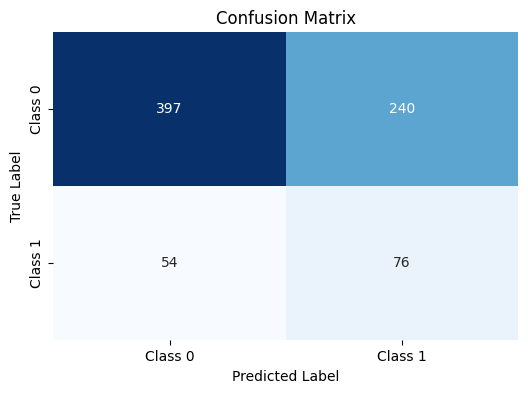

In [ ]:
cm = confusion_matrix(y1_test, nb1_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Split Data 80:20

In [ ]:
print("- Naive Bayes Evaluation -")
print(classification_report(y2_test, nb2_pred))
print("Score roc-auc: ", roc_auc_score(y2_test, nb2_proba_nb))

- Naive Bayes Evaluation -
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1267
           1       0.25      0.58      0.35       266

    accuracy                           0.63      1533
   macro avg       0.57      0.61      0.55      1533
weighted avg       0.77      0.63      0.67      1533

Score roc-auc:  0.6353754354315149


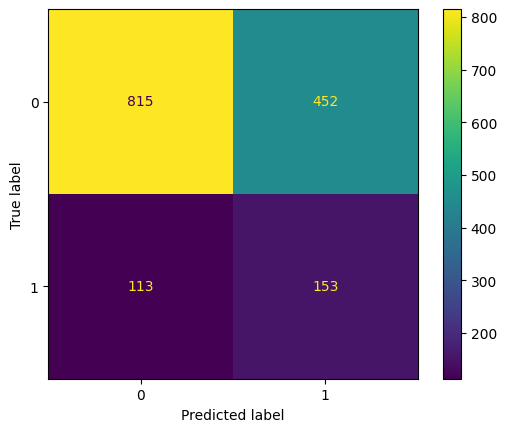

In [ ]:
ConfusionMatrixDisplay.from_predictions(y2_test, nb2_pred)

Model 2: Decision Tree

Split Data 90:10

In [ ]:
print("- Decision Tree Evaluation -")
print(classification_report(y1_test, tree1_pred))
print("Score roc-auc: ", roc_auc_score(y1_test, tree1_proba_nb))

- Decision Tree Evaluation -
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       637
           1       0.24      0.56      0.34       130

    accuracy                           0.63       767
   macro avg       0.56      0.60      0.54       767
weighted avg       0.77      0.63      0.67       767

Score roc-auc:  0.6625649076198528


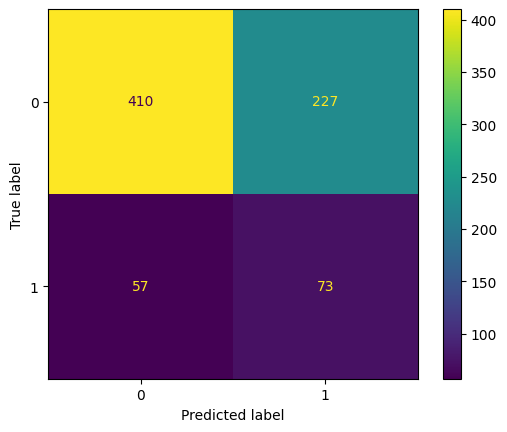

In [ ]:
ConfusionMatrixDisplay.from_predictions(y1_test, tree1_pred)

In [ ]:
print("\n=== Rules ===")
tree_rules = export_text(tree1, feature_names=list(X.columns))
print(tree_rules)


=== Rules ===
|--- Humidity <= 0.19
|   |--- Weekday_2 <= 0.50
|   |   |--- Weekday_0 <= 0.50
|   |   |   |--- Weekday_1 <= 0.50
|   |   |   |   |--- Weekday_3 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Weekday_3 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Weekday_1 >  0.50
|   |   |   |   |--- Outlook_sunny <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Outlook_sunny >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Weekday_0 >  0.50
|   |   |   |--- Outlook_overcast <= 0.50
|   |   |   |   |--- Outlook_rainy <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Outlook_rainy >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Outlook_overcast >  0.50
|   |   |   |   |--- Holiday <= -0.77
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Holiday >  -0.77
|   |   |   |   |   |--- class: 0
|   |--- Weekday_2 >  0.50
|   |   |--- Outlook_sunny <= 0.50
|   |   |   |--- Humidity <= -0.05
|   |   |   |   |--- Temp

Split Data 80:20

In [ ]:
print("- Decision Tree Evaluation -")
print(classification_report(y2_test, tree2_pred))
print("Score roc-auc: ", roc_auc_score(y2_test, tree2_proba_nb))

- Decision Tree Evaluation -
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1267
           1       0.26      0.20      0.22       266

    accuracy                           0.77      1533
   macro avg       0.55      0.54      0.54      1533
weighted avg       0.74      0.77      0.75      1533

Score roc-auc:  0.5816222679825056


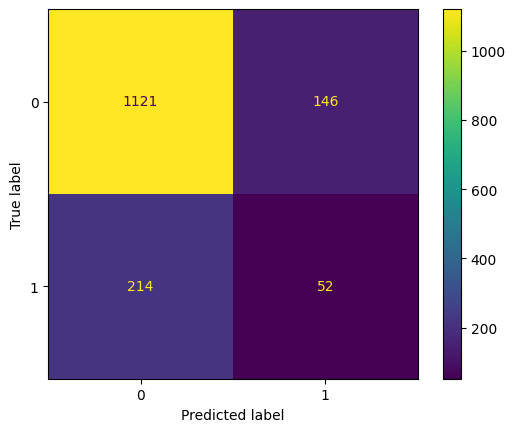

In [ ]:
ConfusionMatrixDisplay.from_predictions(y2_test, tree2_pred)

In [ ]:
print("\n=== Rules ===")
tree_rules = export_text(tree2, feature_names=list(X.columns))
print(tree_rules)


=== Rules ===
|--- Humidity <= 0.19
|   |--- Weekday_0 <= 0.50
|   |   |--- Weekday_2 <= 0.50
|   |   |   |--- Weekday_1 <= 0.50
|   |   |   |   |--- Weekday_3 <= 0.50
|   |   |   |   |   |--- Weekday_4 <= 0.50
|   |   |   |   |   |   |--- Weekday_6 <= 0.50
|   |   |   |   |   |   |   |--- Weekday_5 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Weekday_5 >  0.50
|   |   |   |   |   |   |   |   |--- Season_Autumn <= 0.50
|   |   |   |   |   |   |   |   |   |--- Holiday <= -1.67
|   |   |   |   |   |   |   |   |   |   |--- Crowdedness <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Crowdedness >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Holiday >  -1.67
|   |   |   |   |   |   |   |   |   |   |--- Holiday <= -1.29
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   | 

Metrik Evaluasi (Kelas 1 (Play Golf))

90:10
Metrik          NB              DT
Precision       0.24            0.24
Recall          0.58            0.56
F1-score        0.34            0.34
AUC-ROC         0.63            0.66

80:20
Metrik          NB              DT
Precision       0.25            0.26
Recall          0.58            0.20
F1-score        0.35            0.22
AUC-ROC         0.63            0.58

Pengujian model dilakukan menggunakan 2 skenario pembagian data training & testing, yaitu skenario 1: 90:10, dan skenario 2: 80:20

- Skenario 1: 90:10, NB unggul di recall, DT unggul di AUC-ROC

- Skenario 2: 80:20, NB unggul di recall, F1-score, AUC-ROC, DT unggul di precision (selisih 0.1)

Kesimpulan:
Naive Bayes menunjukkan performa keseluruhan yang lebih baik untuk imbalanced data.

Naive Bayes unggul dalam metrik Recall. Artinya, Naive Bayes lebih baik dalam menangkap orang yang berpotensi bermain golf.




Test New Data

In [ ]:
new_data = [[1, 2.9, 49.0, 0, 0.74, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]

In [ ]:
predict_data = nb2.predict(new_data)
print("Predict Result: ", predict_data)

Predict Result:  [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
